C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_4704\2135587805.py:19: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  kategorical_features = train[less].select_dtypes(include=['object']).columns


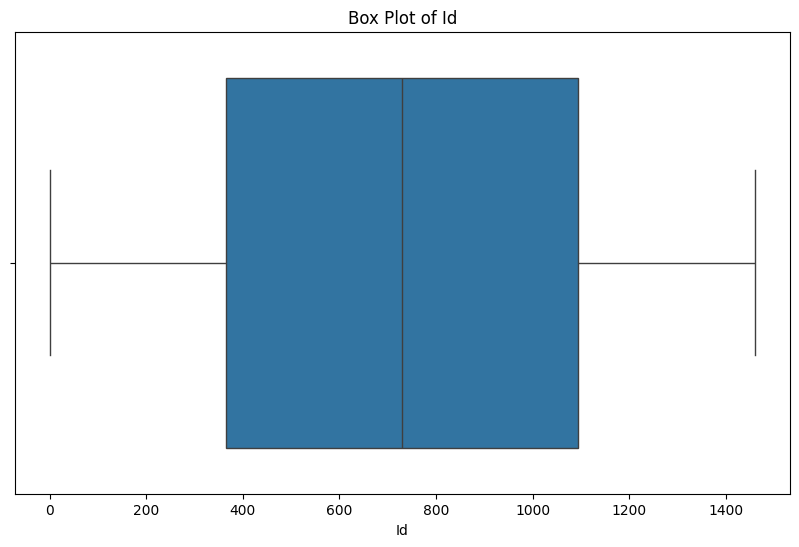

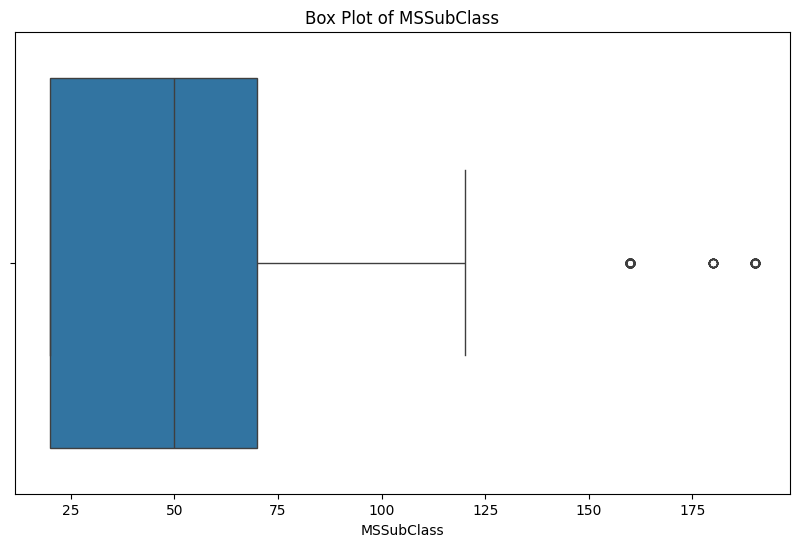

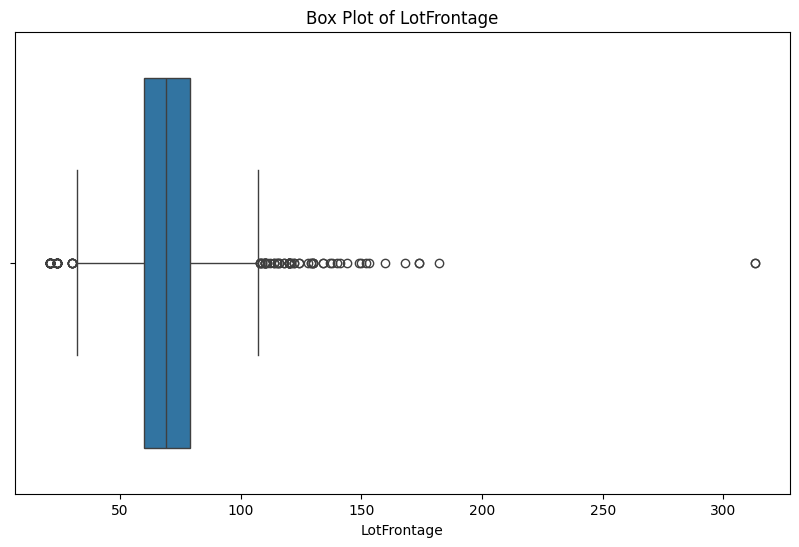

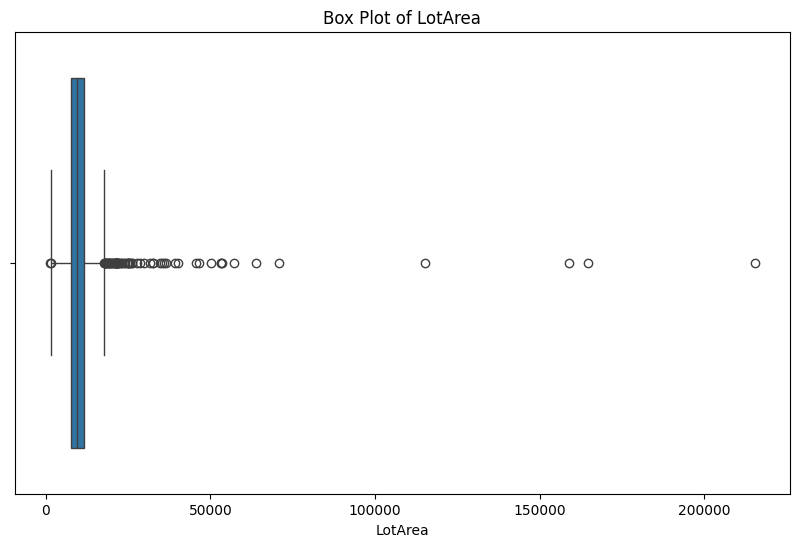

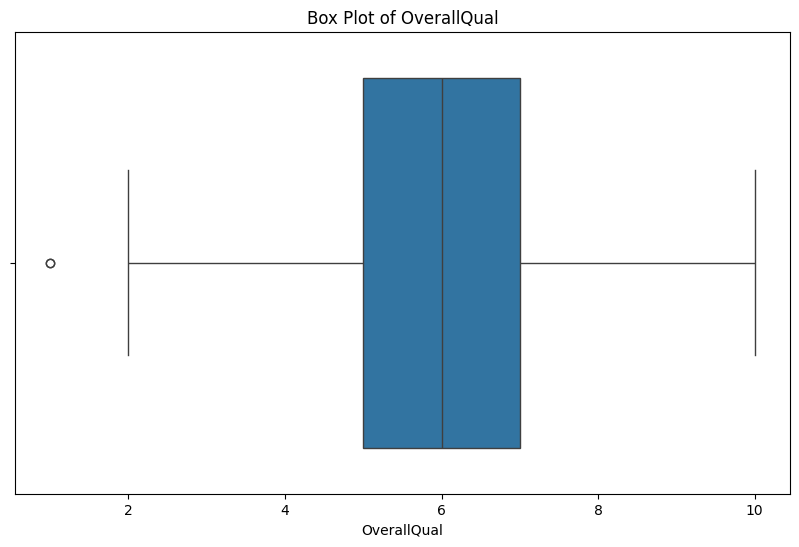

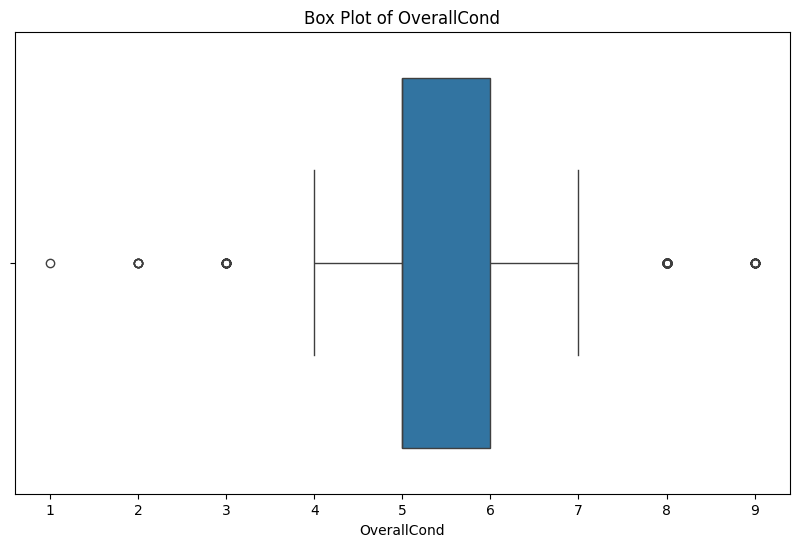

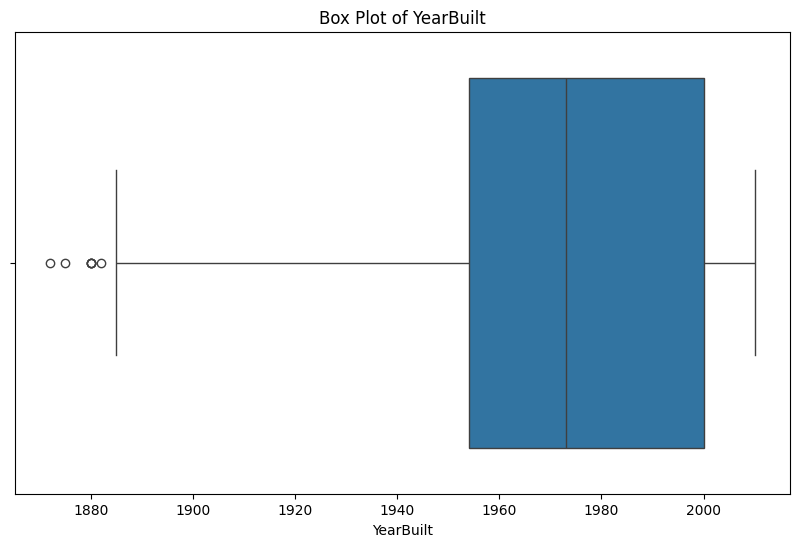

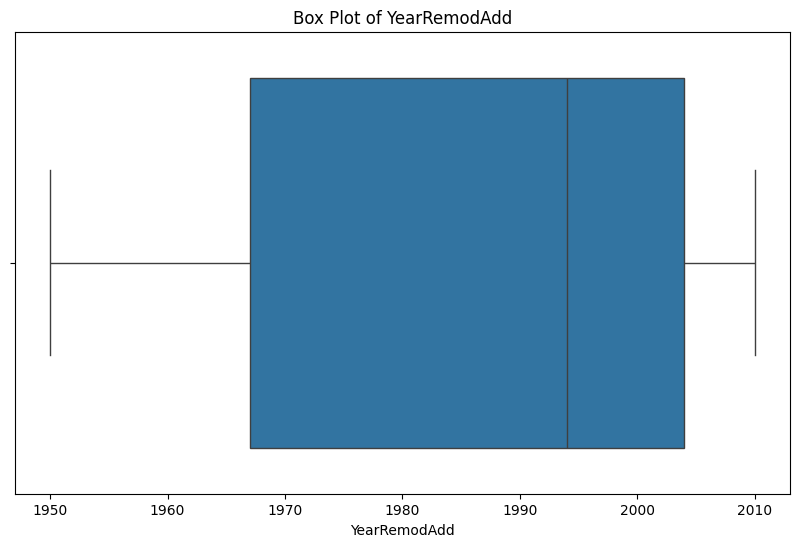

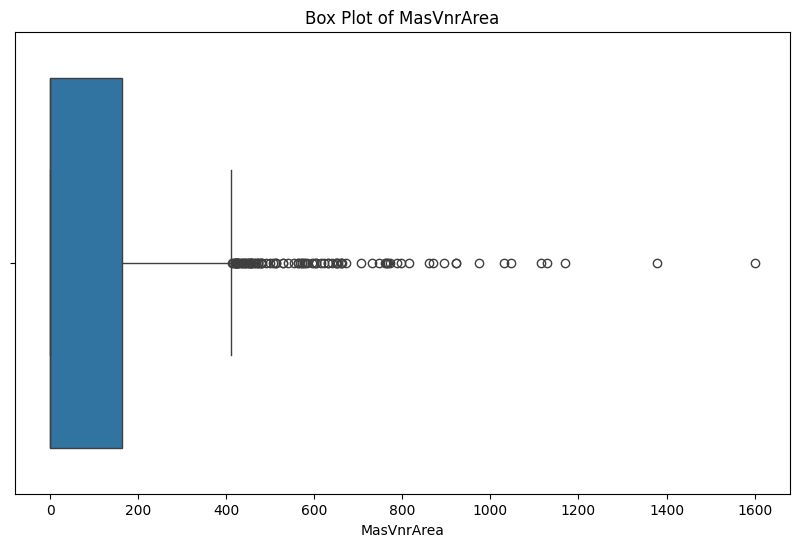

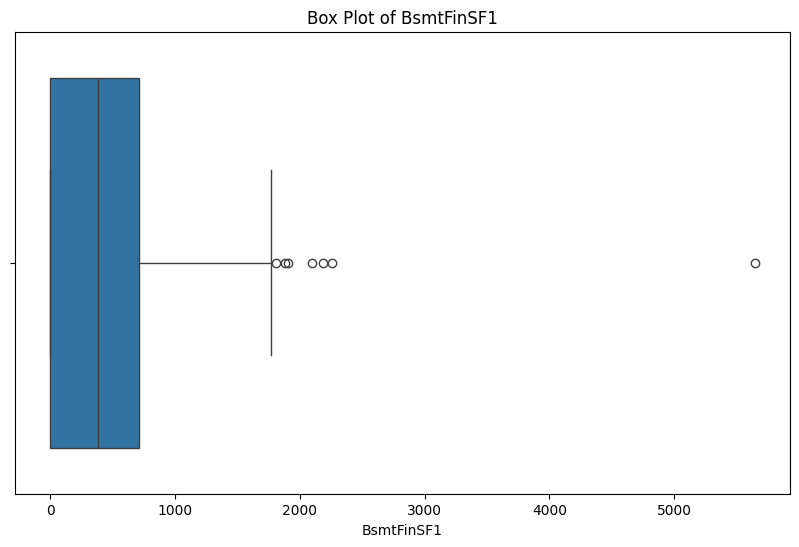

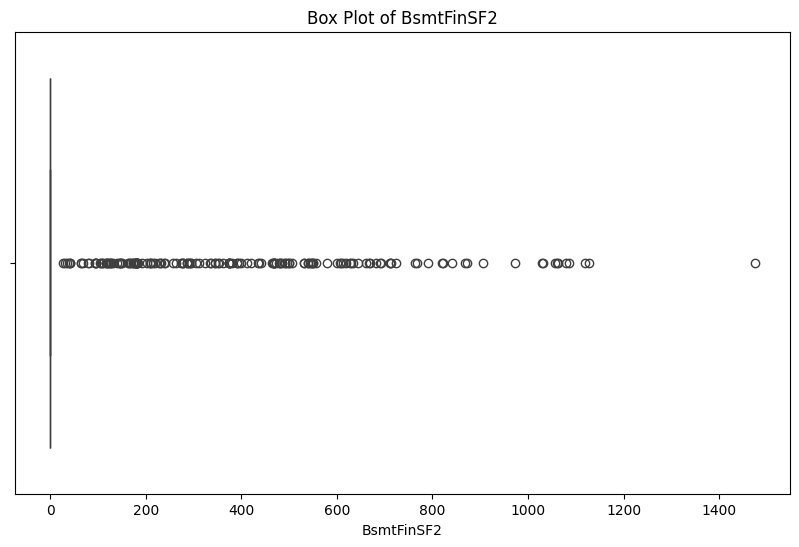

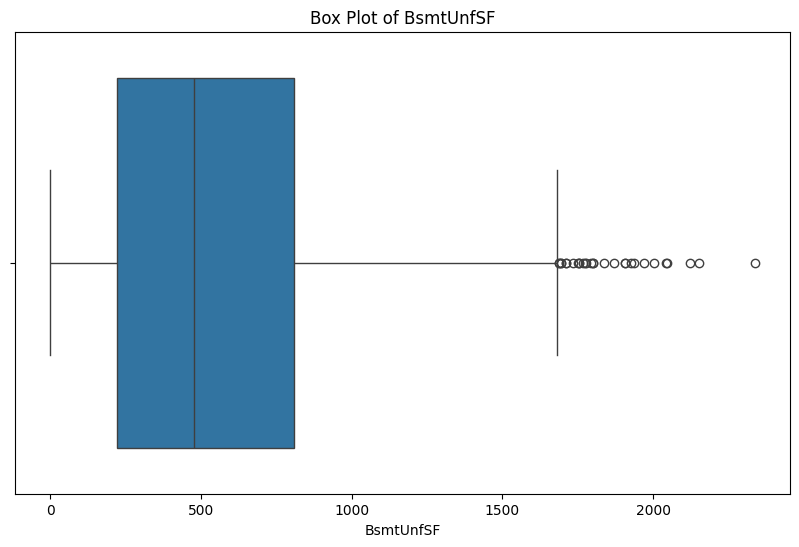

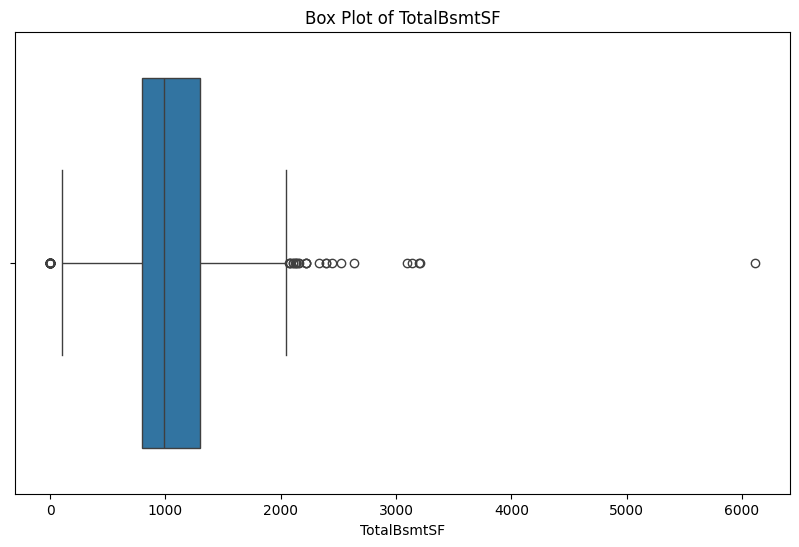

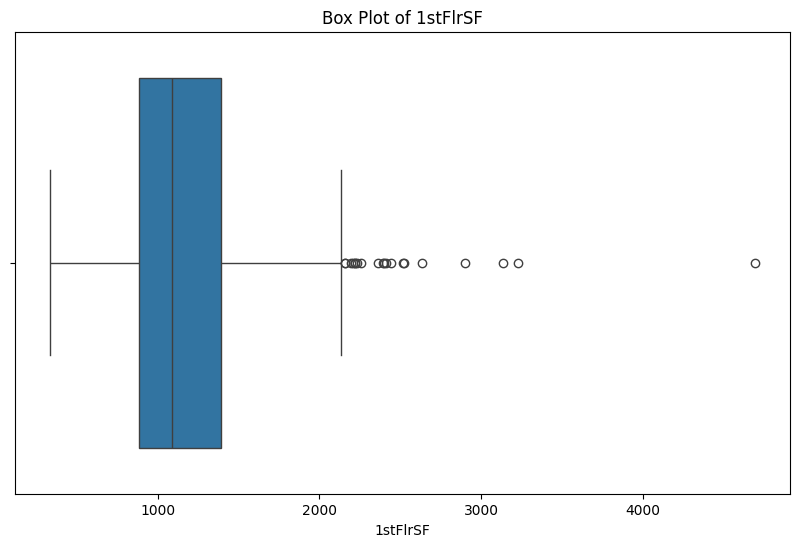

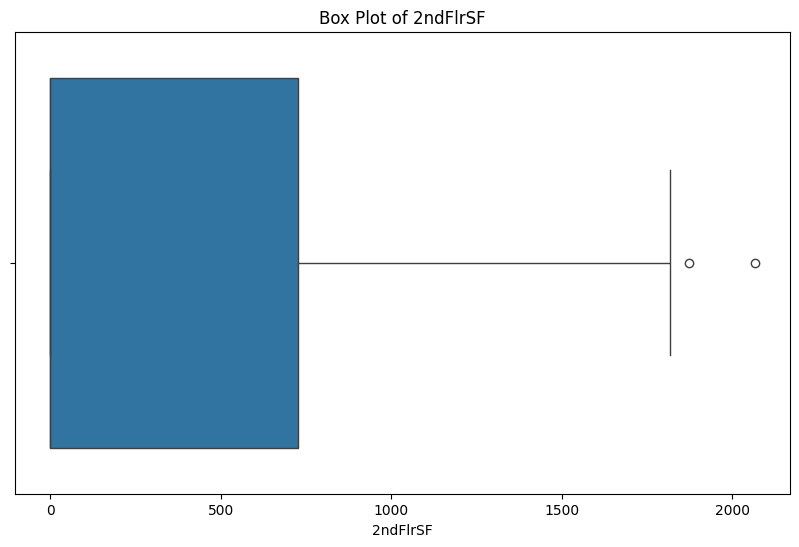

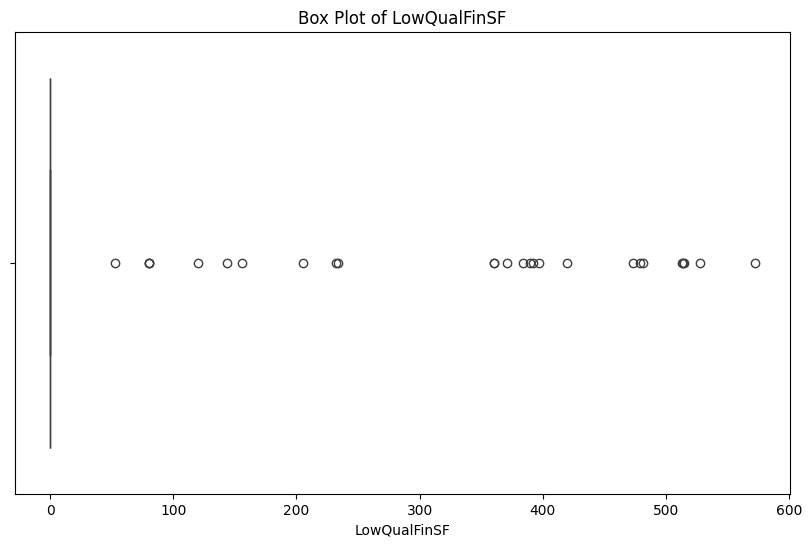

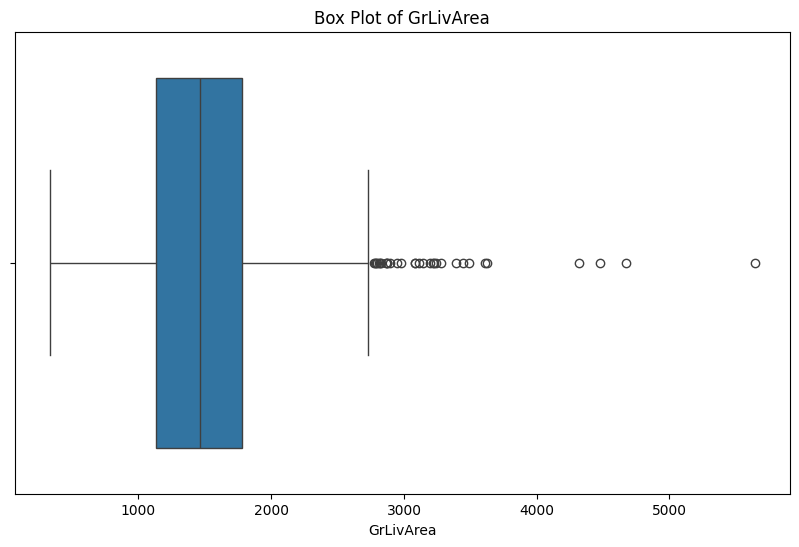

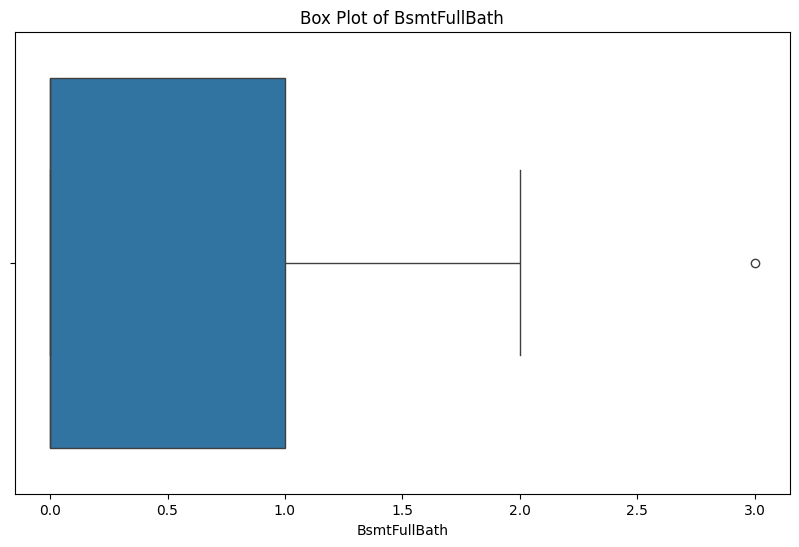

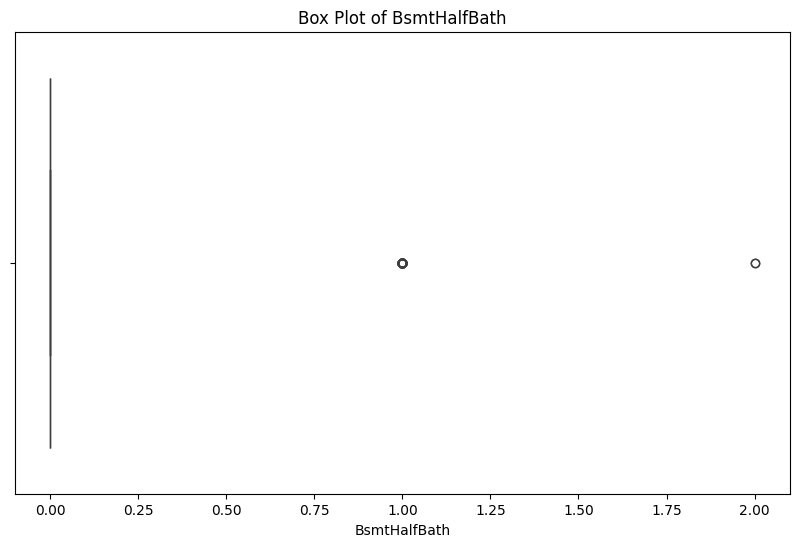

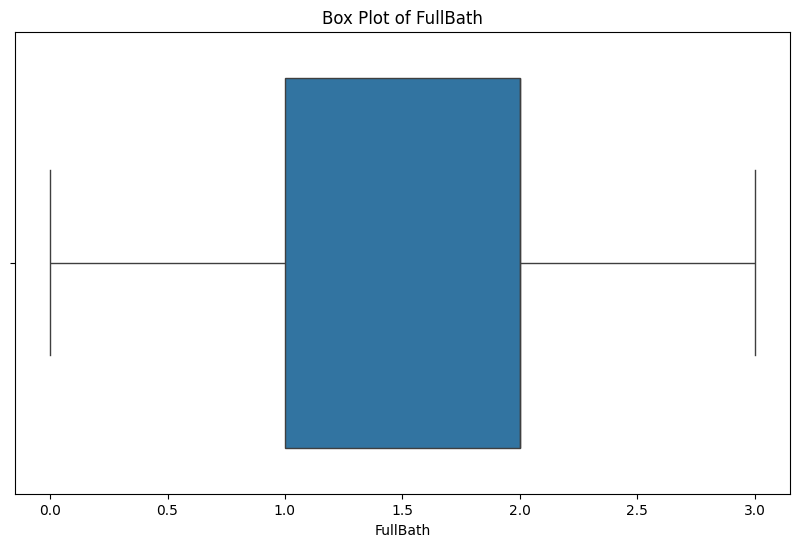

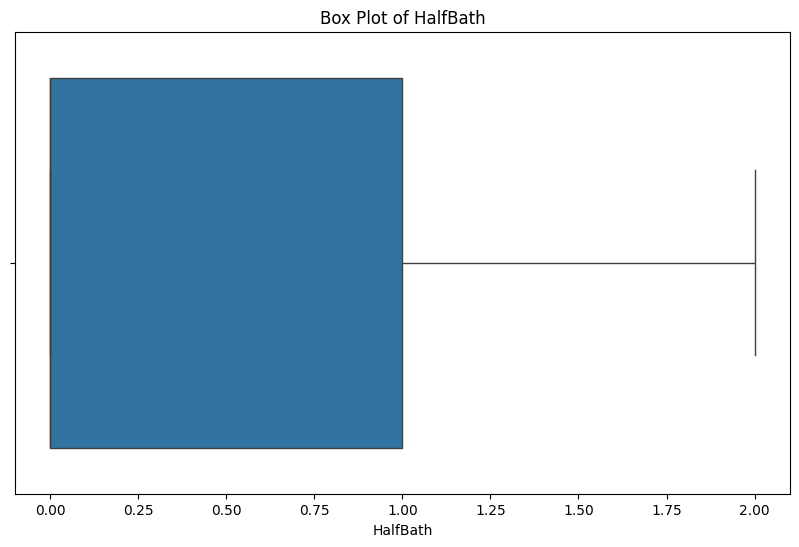

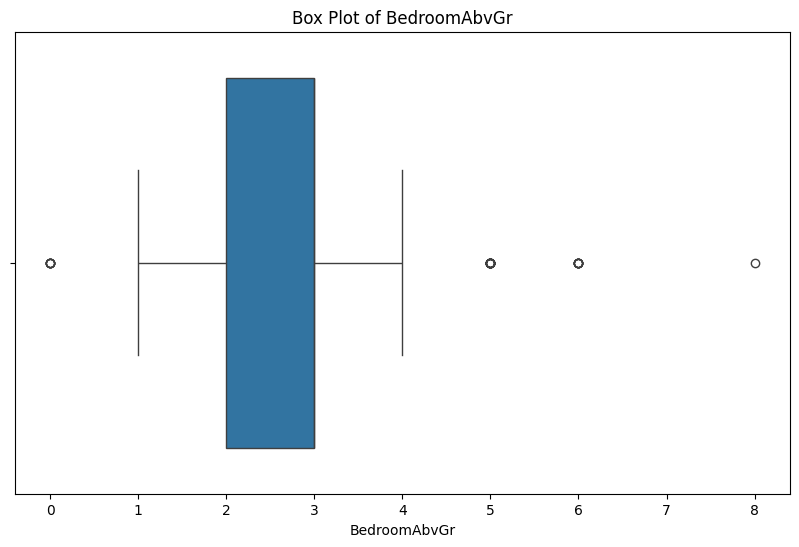

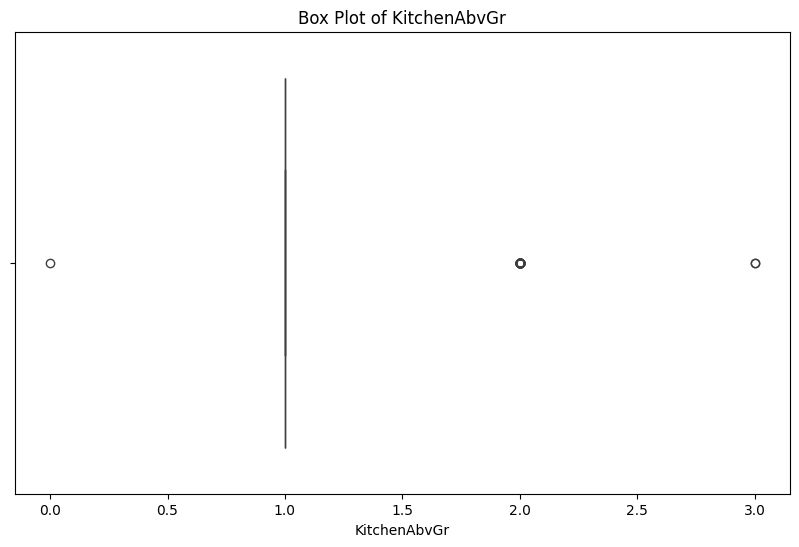

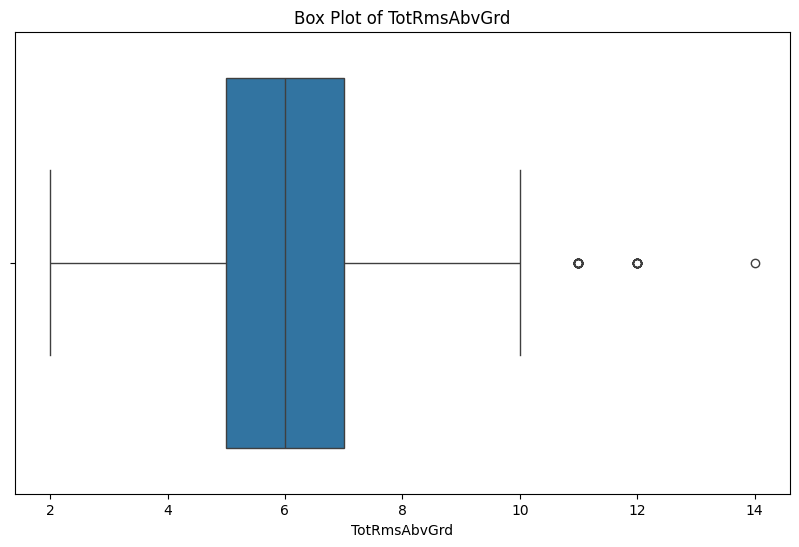

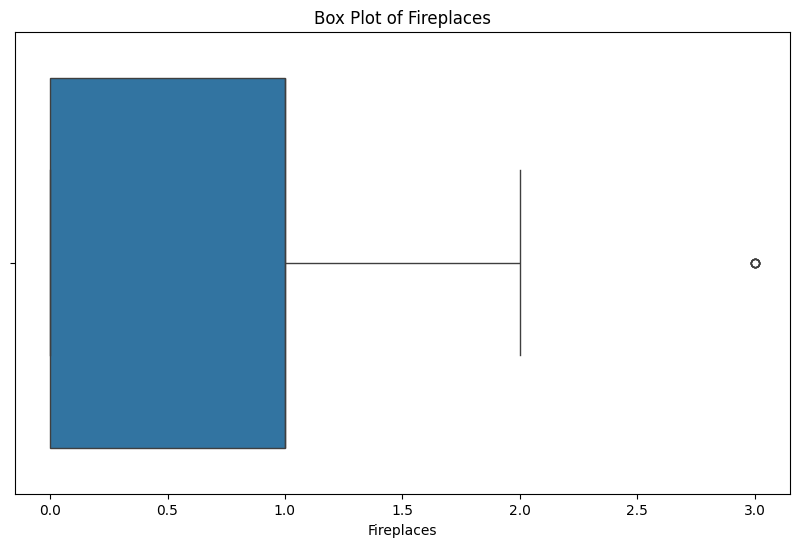

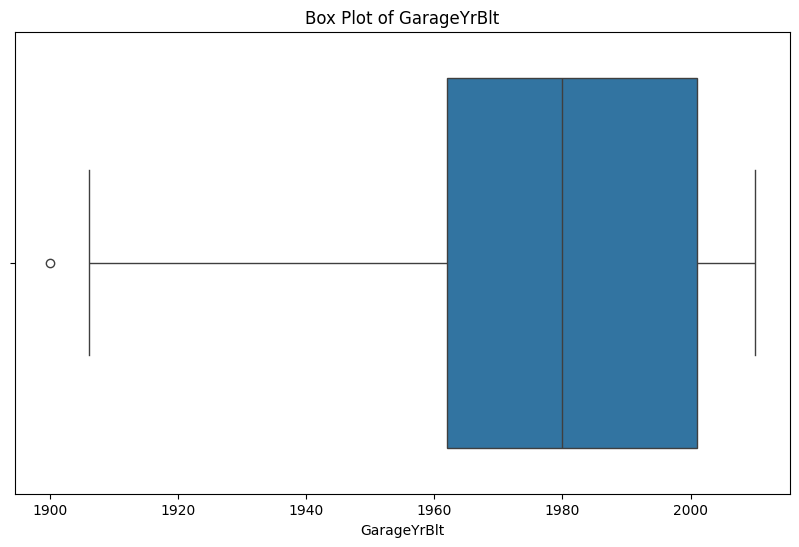

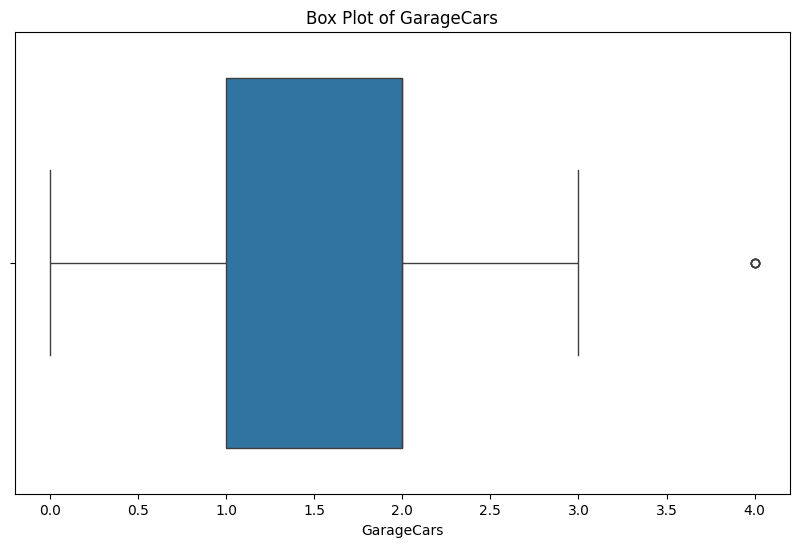

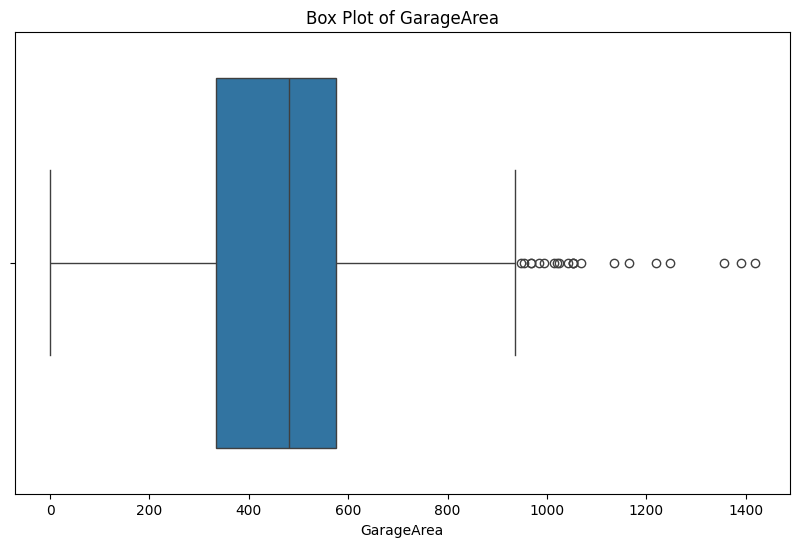

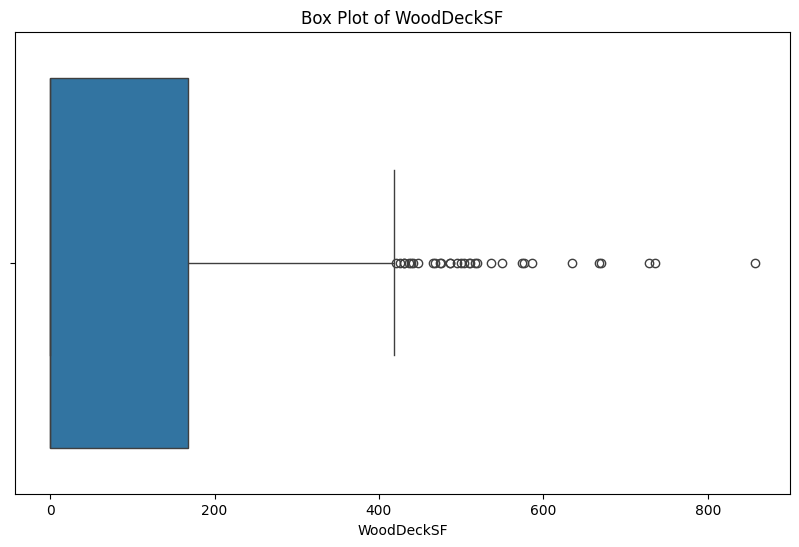

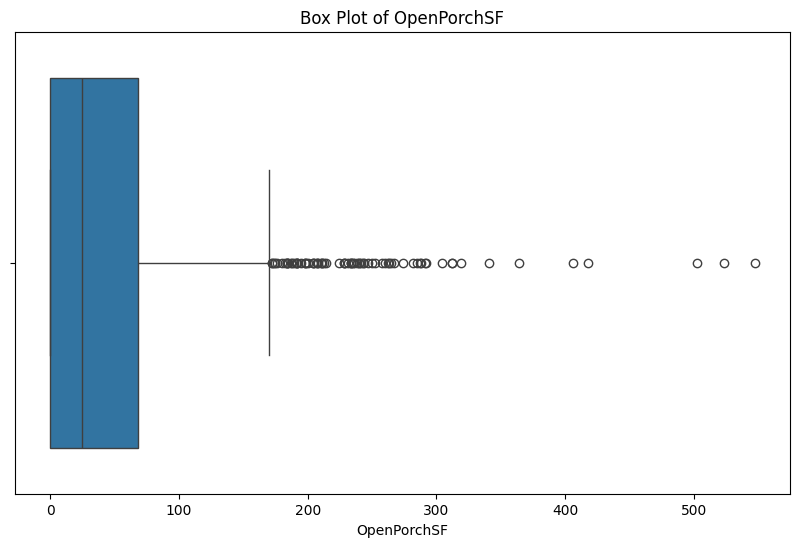

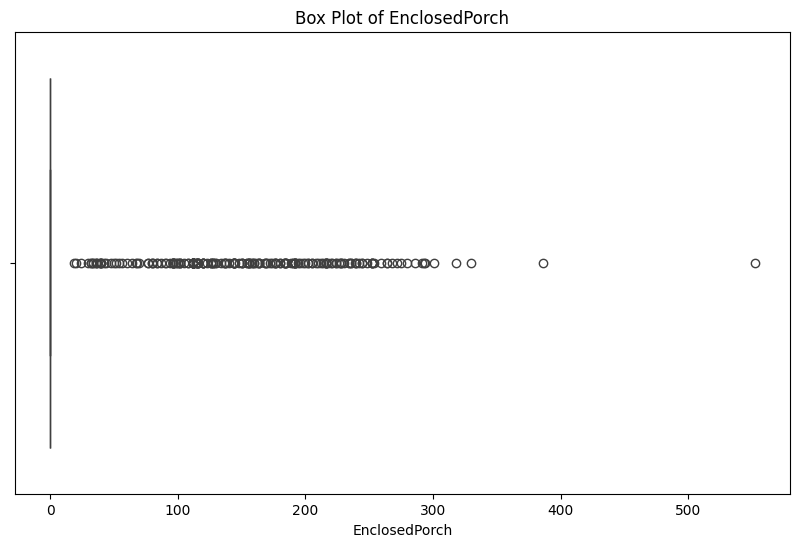

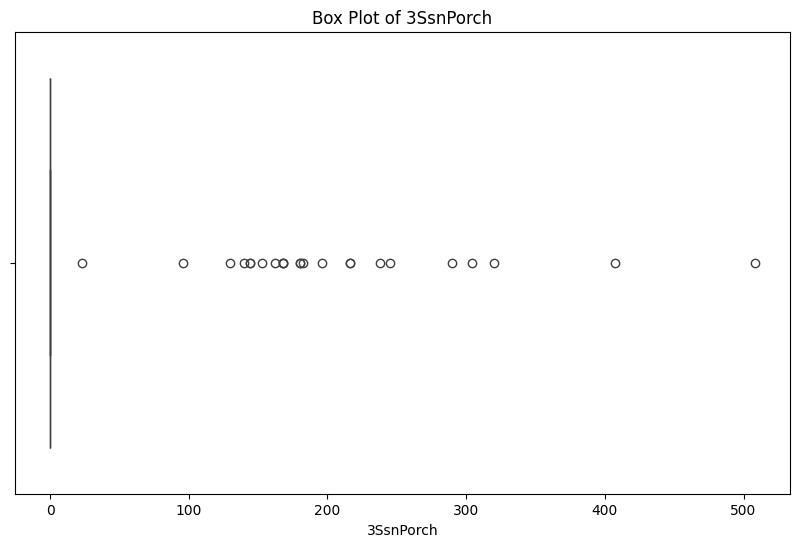

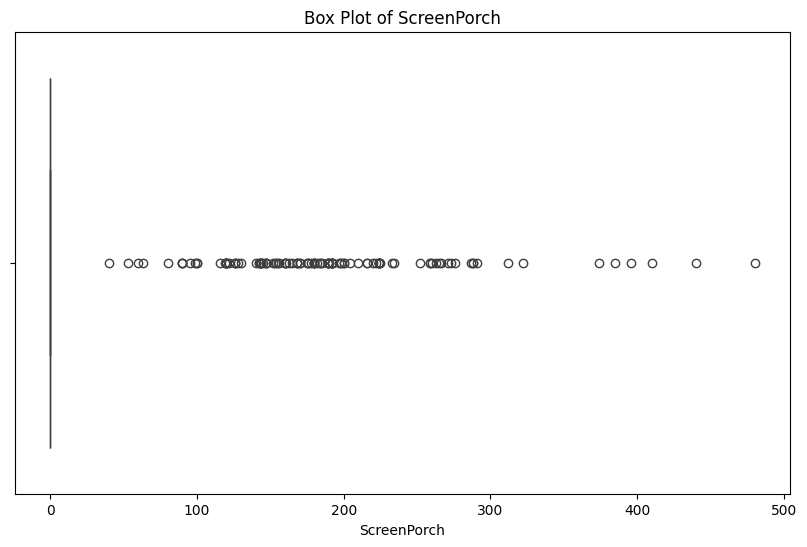

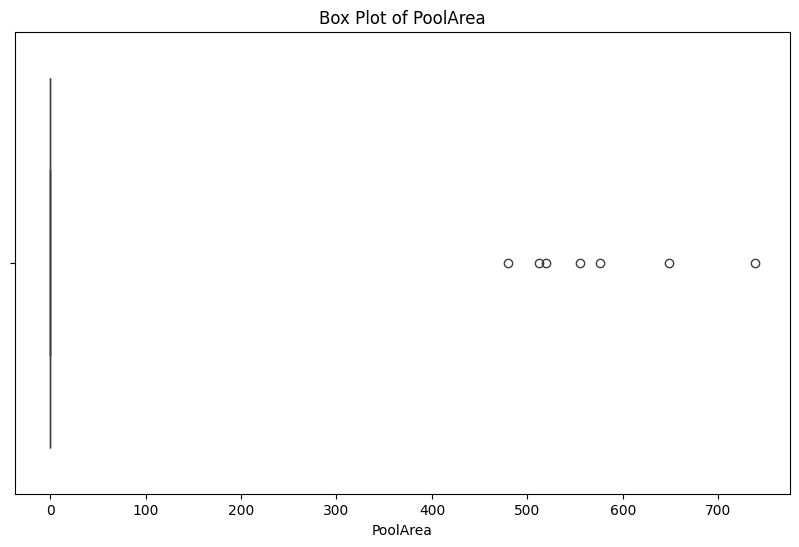

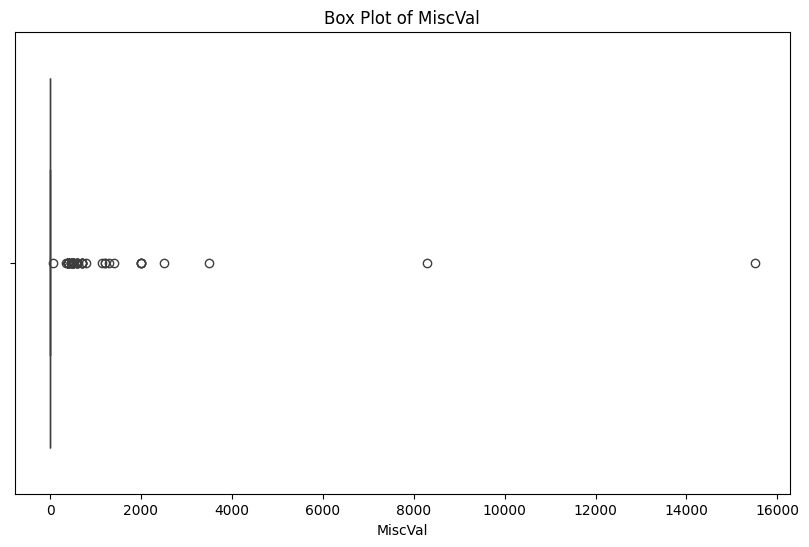

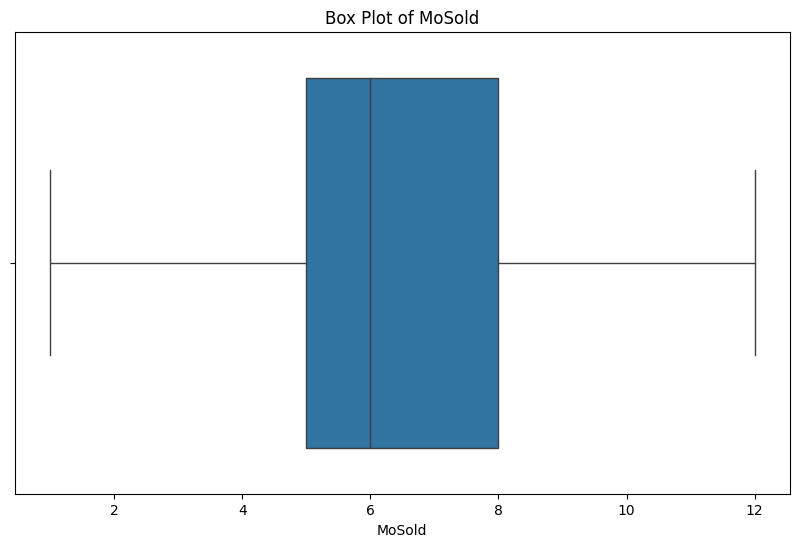

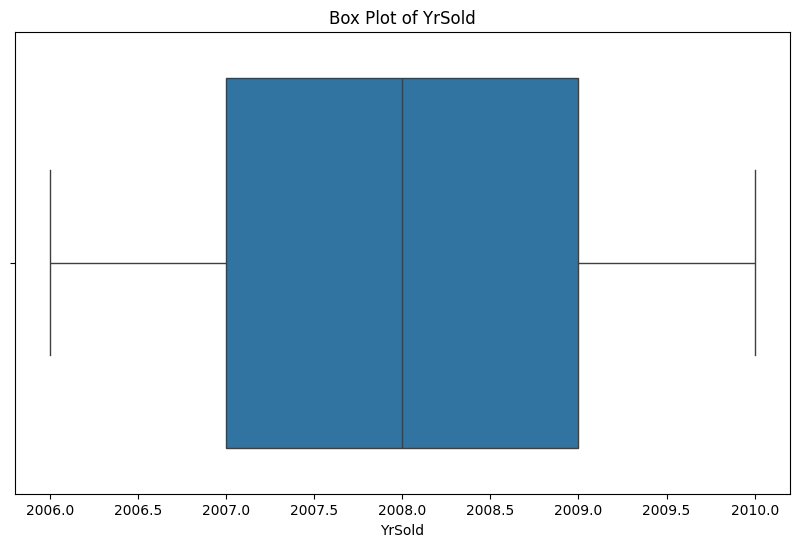

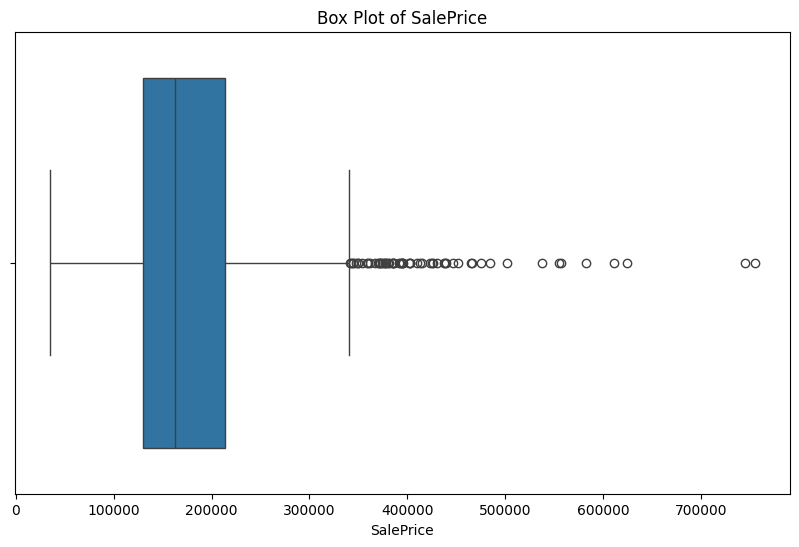

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memeriksa jumlah nilai yang hilang di setiap kolom
train = pd.read_csv("content/train.csv")
missing_values = train.isnull().sum()
missing_values[missing_values > 0]

missing_values = train.isnull().sum()
less = missing_values[missing_values < 1000].index
over = missing_values[missing_values >= 1000].index

# Contoh mengisi nilai yang hilang dengan median untuk kolom numerik
numeric_features = train[less].select_dtypes(include=['number']).columns
train[numeric_features] = train[numeric_features].fillna(train[numeric_features].median())

# Contoh mengisi nilai yang hilang dengan mode untuk kolom kategori
kategorical_features = train[less].select_dtypes(include=['object']).columns
 
for column in kategorical_features:
    train[column] = train[column].fillna(train[column].mode()[0])

# Menghapus kolom dengan terlalu banyak nilai yang hilang
df = train.drop(columns=over)

missing_values = df.isnull().sum()
missing_values[missing_values > 0]

for feature in numeric_features:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x=df[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()